In [1]:
%matplotlib inline
import numpy as np 
from matplotlib.image import imread
import matplotlib.pyplot as plt
import os
plt.style.use('seaborn-darkgrid')

In [2]:
def show_image(im, title="Image"):
    plt.figure(facecolor="white")
    plt.imshow(im)
    plt.axis('off')
    plt.title(title)
    plt.show()

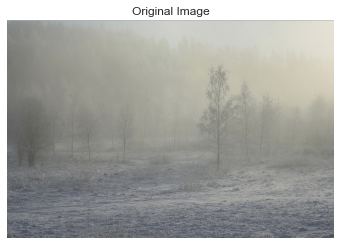

In [3]:
A = imread('images/scene.png')#imported the jpg
show_image(A, title="Original Image")

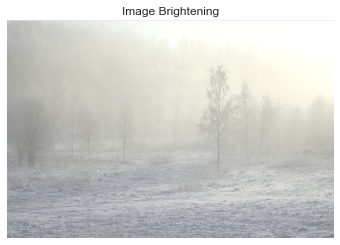

In [4]:
show_image(np.minimum(1,A + 0.2), title="Image Brightening")

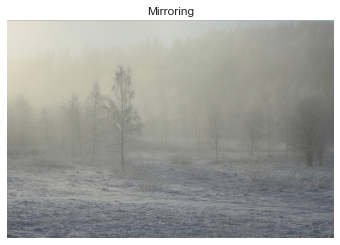

In [5]:
show_image(A[:,::-1], title="Mirroring")

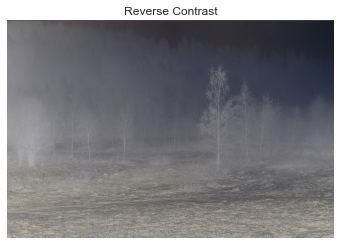

In [6]:
Imax, Imin = 1, 0
show_image(Imax - A[:,:,:3] + Imin, title="Reverse Contrast")

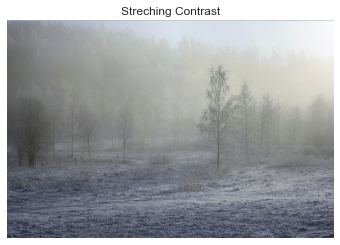

In [7]:
im1 = np.ones(A.shape)
for i in range(3):
    im = A[:,:,i]
    im1[:,:,i] = np.minimum(Imax,(im - np.min(im))*(Imax - Imin)/(np.max(im) - np.min(im)) + Imin)

show_image(im1, "Streching Contrast")

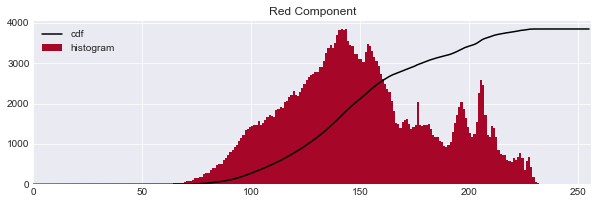

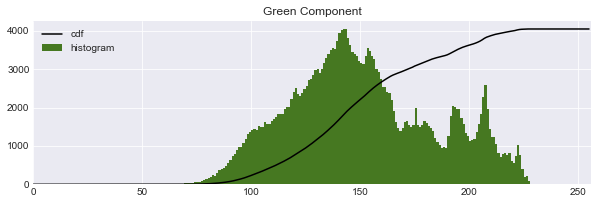

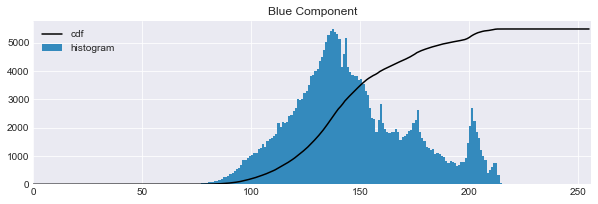

In [8]:
imred = np.rint(A[:,:,0].reshape(-1) * 255).astype(int)
imgreen = np.rint(A[:,:,1].reshape(-1) * 255).astype(int)
imblue = np.rint(A[:,:,2].reshape(-1) * 255).astype(int) 

color = ["#A60628", "#467821", "#348ABD"]
# color = ["Red", "Green", "Blue"]
pigments = [imred, imgreen, imblue]
title = ["Red Component", "Green Component", "Blue Component"]

for c,p,t in zip(color, pigments, title):
    f = plt.figure(figsize=(10,3), facecolor="white")
    
    hist,bins = np.histogram(p,256,[0,256])
    cdf = hist.cumsum()
    
    cdf_normalized = cdf * float(hist.max()) / cdf.max()
    plt.plot(cdf_normalized, color='black')
    
    plt.hist(p,256,[0,256], color=c)

    plt.xlim([0,256])
    plt.legend(('cdf','histogram'), loc = 'upper left')
    plt.title(t)
    plt.show()

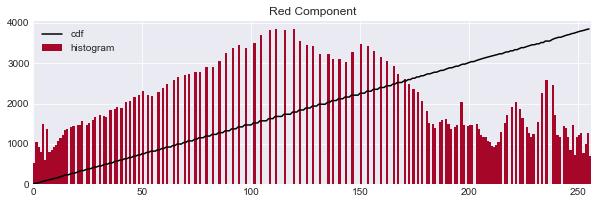

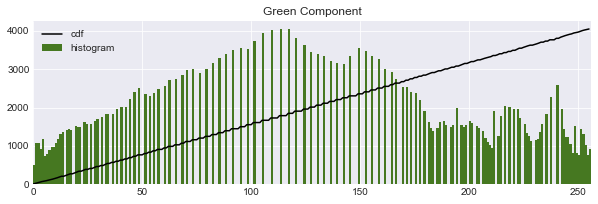

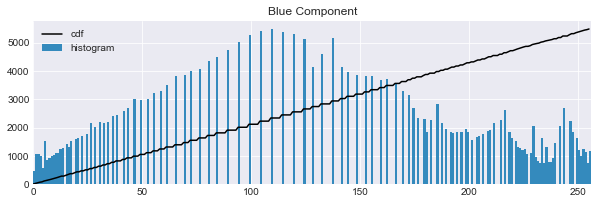

In [9]:
Imax, Imin = 255, 0

A_new = np.ones(A.shape)
idx = 0

for c,p,t in zip(color, pigments, title):
    f = plt.figure(figsize=(10,3), facecolor="white")

    hist,bins = np.histogram(p,Imax+1,[0,Imax+1])
    p_cdf = hist.cumsum()
    
    cdf_min = p_cdf[np.where(p_cdf != 0)[0][0]]
    const = Imax/(len(p) - cdf_min)
    
    p_new = np.rint((p_cdf[p] - cdf_min)*const).astype(int)
    
    hist,bins = np.histogram(p_new,256,[0,256])
    p_new_cdf = hist.cumsum()
    
    cdf_normalized = p_new_cdf * float(hist.max()) / p_new_cdf.max()

    plt.plot(cdf_normalized, color='black')
    plt.hist(p_new,256,[0,256], color=c)
    
    plt.xlim([0,256])
    plt.legend(('cdf','histogram'), loc = 'upper left')
    plt.title(t)
    plt.show()
    
    A_new[:,:,idx] = p_new.reshape(A.shape[0],A.shape[1])/255
    idx += 1

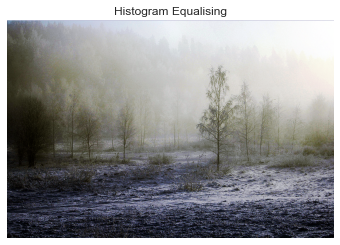

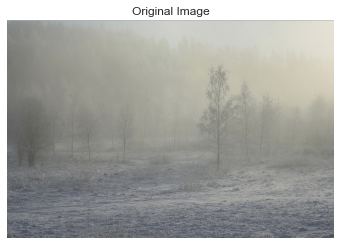

In [10]:
show_image(A_new, "Histogram Equalising")
show_image(A, "Original Image")